In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Importing the Data and Preprocessing EDA

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML Assignments\STATISTICS\KNN\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [8]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


## BUILDING KNN MODEL USING KFOLD

In [9]:
X = df.drop('Type', axis = 1)
Y = df['Type']


k_fold = KFold(n_splits=20)
model = KNeighborsClassifier(n_neighbors=3)
val_score = cross_val_score(model,X,Y,cv=k_fold)

In [10]:
val_score

array([0.27272727, 0.54545455, 0.90909091, 0.90909091, 0.36363636,
       0.81818182, 1.        , 0.72727273, 0.18181818, 0.45454545,
       0.90909091, 0.36363636, 0.63636364, 0.        , 0.1       ,
       0.1       , 0.1       , 0.3       , 0.9       , 1.        ])

In [11]:
print(val_score.mean())

0.5295454545454545


## Visualizing The KNN and Visualizing the CV results

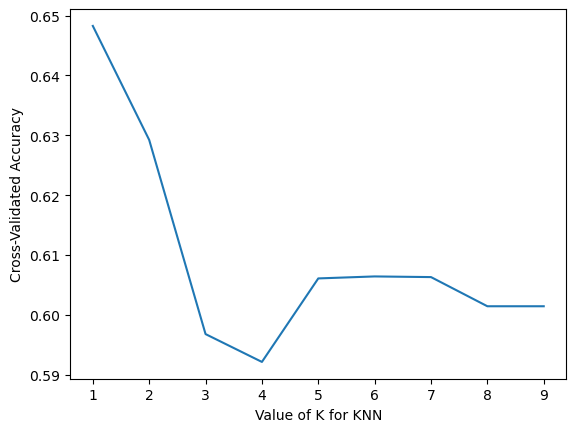

In [27]:
# choose k between 1 to 10
k_range = range(1, 10)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## BUILDING MODEL USING TRAIN_TEST_SPLIT

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=15)

model_2 = KNeighborsClassifier(n_neighbors=3)


In [15]:
model_2.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = model_2.predict(X_test)
y_pred

array([2, 1, 2, 2, 5, 2, 1, 1, 7, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 3, 1, 1,
       2, 1, 1, 1, 2, 7, 7, 1, 1, 1, 2, 1, 2, 7, 7, 2, 2, 2, 2, 2, 2, 1,
       3, 1, 7, 1, 2, 7, 7, 1, 2, 1], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test,y_pred))
print(model_2.score(X_train,Y_train))

0.5740740740740741
0.8113207547169812


## Visualizing The KNN and results

In [29]:
# range of k we want to try
# empty list to store scores

k_range_2 = range(1,10)
k_score_2 = []


#we will loop through reasonable values of k
for i in k_range_2:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=i)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=8, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_score_2.append(scores.mean())


# k_scores=grid.best_score_
dframe = pd.DataFrame()
dframe["no_neighbours"]= range(1,10)
dframe["Accuracy"] = pd.DataFrame(k_score)
dframe

,no_neighbours,Accuracy
0,1,0.648283
1,2,0.601329
2,3,0.676460
3,4,0.313925
4,5,0.676460
5,6,0.601140
6,7,NaN
7,8,NaN
8,9,NaN


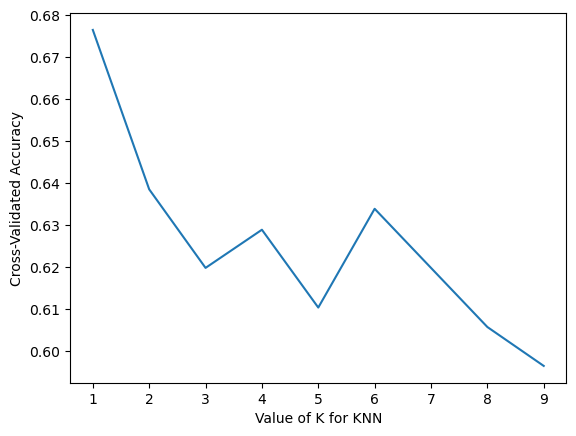

In [30]:
plt.plot(k_range_2, k_score_2)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()